# Steps For Data Cleaning, Wragling:

#### 1. Remove Extra Spaces ( By using rename, etc  function )
#### 2. Check & Fill Blank Cells i.e null, NaN, None, etc ( By using isna, isnull, fillna, fillnull, dropna, etc functions )
#### 3. Convert Catogory datapoints into Numeric ( By using one not endoding tech, etc )
#### 4. Remove Duplicates ( Drop the entire column or use .drop_duplicates() ) 
#### 5. Highlight errors.
#### 6. Change Text i.e column & index names into Lower/Upper/Proper Case. ( By using  rename function )
#### 7. Spell check if not right ( rename function )
#### 8. Delete all Formatting, unwanted i.e columns which is not important by using domain and visualaisation knowledge.
# ....

## We will also take out various conclusions i.e intutions from this data after completing the above steps which is very important for bussiness as well as manufacturing point of view..!

In [ ]:
# Lets start..

# Importing the required  Libraries & Reading the jason file from url2...!

In [1]:
import numpy as np, seaborn as sns, pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

url2 = "http://citibikenyc.com/stations/json"

df = pd.read_json(url2, orient='columns')
df.head()

,executionTime,stationBeanList
0,2019-11-15 05:31:28 AM,"{'id': 281, 'stationName': 'Grand Army Plaza &..."
1,2019-11-15 05:31:28 AM,"{'id': 307, 'stationName': 'Canal St & Rutgers..."
2,2019-11-15 05:31:28 AM,"{'id': 347, 'stationName': 'Greenwich St & W H..."
3,2019-11-15 05:31:28 AM,"{'id': 358, 'stationName': 'Christopher St & G..."
4,2019-11-15 05:31:28 AM,"{'id': 367, 'stationName': 'E 53 St & Lexingto..."


### Taking out one unclean data which in the dict form...!

In [2]:
df.iloc[0,1]

{'id': 281,
 'stationName': 'Grand Army Plaza & Central Park S',
 'availableDocks': 31,
 'totalDocks': 66,
 'latitude': 40.7643971,
 'longitude': -73.97371465,
 'statusValue': 'In Service',
 'statusKey': 1,
 'availableBikes': 34,
 'stAddress1': 'Grand Army Plaza & Central Park S',
 'stAddress2': '',
 'city': '',
 'postalCode': '',
 'location': '',
 'altitude': '',
 'testStation': False,
 'lastCommunicationTime': '2019-11-15 05:30:53 AM',
 'landMark': ''}

### Converting the dict form datapoints i.e column2 into multiple Series to form a dataframe...!

In [3]:
df1=df['stationBeanList'].apply(pd.Series)
df1.head()

,id,stationName,availableDocks,totalDocks,latitude,longitude,statusValue,statusKey,availableBikes,stAddress1,stAddress2,city,postalCode,location,altitude,testStation,lastCommunicationTime,landMark
0,281,Grand Army Plaza & Central Park S,31,66,40.764397,-73.973715,In Service,1,34,Grand Army Plaza & Central Park S,,,,,,False,2019-11-15 05:30:53 AM,
1,307,Canal St & Rutgers St,11,30,40.714275,-73.989900,In Service,1,19,Canal St & Rutgers St,,,,,,False,2019-11-15 05:29:45 AM,
2,347,Greenwich St & W Houston St,20,35,40.728846,-74.008591,In Service,1,15,Greenwich St & W Houston St,,,,,,False,2019-11-15 05:29:32 AM,
3,358,Christopher St & Greenwich St,33,50,40.732916,-74.007114,In Service,1,16,Christopher St & Greenwich St,,,,,,False,2019-11-15 05:30:24 AM,
4,367,E 53 St & Lexington Ave,8,34,40.758281,-73.970694,In Service,1,26,E 53 St & Lexington Ave,,,,,,False,2019-11-15 05:30:25 AM,


In [4]:
df1.shape

(910, 18)

In [5]:
df1.isnull().sum()    # since in empty columns NaN is not written we should do something

id                       0
stationName              0
availableDocks           0
totalDocks               0
latitude                 0
longitude                0
statusValue              0
statusKey                0
availableBikes           0
stAddress1               0
stAddress2               0
city                     0
postalCode               0
location                 0
altitude                 0
testStation              0
lastCommunicationTime    0
landMark                 0
dtype: int64

In [6]:
df1.dropna(axis=1,how='all').shape      # since NaN is not written in empty columns we should use some other method

(910, 18)

### Premaring a temparory dataframe using indexing which we think is empty i.e unwanted columns & checking if its really or not...!

In [7]:
tdf=df1['stAddress2 city postalCode location altitude landMark'.split()]
tdf.head()

,stAddress2,city,postalCode,location,altitude,landMark
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,


In [8]:
tdf.describe()

,stAddress2,city,postalCode,location,altitude,landMark
count,910,910,910,910,910,910
unique,1,1,1,1,1,1
top,,,,,,
freq,910,910,910,910,910,910


In [9]:
tdf['stAddress2'].unique()     # hence this are empty columns..

array([''], dtype=object)

### Drop out the columns which found to be empty...!

In [10]:
df1.drop(columns='stAddress2 city postalCode location altitude landMark'.split(),inplace=True)
df1.head()

,id,stationName,availableDocks,totalDocks,latitude,longitude,statusValue,statusKey,availableBikes,stAddress1,testStation,lastCommunicationTime
0,281,Grand Army Plaza & Central Park S,31,66,40.764397,-73.973715,In Service,1,34,Grand Army Plaza & Central Park S,False,2019-11-15 05:30:53 AM
1,307,Canal St & Rutgers St,11,30,40.714275,-73.989900,In Service,1,19,Canal St & Rutgers St,False,2019-11-15 05:29:45 AM
2,347,Greenwich St & W Houston St,20,35,40.728846,-74.008591,In Service,1,15,Greenwich St & W Houston St,False,2019-11-15 05:29:32 AM
3,358,Christopher St & Greenwich St,33,50,40.732916,-74.007114,In Service,1,16,Christopher St & Greenwich St,False,2019-11-15 05:30:24 AM
4,367,E 53 St & Lexington Ave,8,34,40.758281,-73.970694,In Service,1,26,E 53 St & Lexington Ave,False,2019-11-15 05:30:25 AM


# Cleaned data without using FE & FS...!

In [11]:
df2=pd.concat([df,df1],axis=1)
df2.drop('stationBeanList',axis=1,inplace=True)
df2.head()

,executionTime,id,stationName,availableDocks,totalDocks,latitude,longitude,statusValue,statusKey,availableBikes,stAddress1,testStation,lastCommunicationTime
0,2019-11-15 05:31:28 AM,281,Grand Army Plaza & Central Park S,31,66,40.764397,-73.973715,In Service,1,34,Grand Army Plaza & Central Park S,False,2019-11-15 05:30:53 AM
1,2019-11-15 05:31:28 AM,307,Canal St & Rutgers St,11,30,40.714275,-73.989900,In Service,1,19,Canal St & Rutgers St,False,2019-11-15 05:29:45 AM
2,2019-11-15 05:31:28 AM,347,Greenwich St & W Houston St,20,35,40.728846,-74.008591,In Service,1,15,Greenwich St & W Houston St,False,2019-11-15 05:29:32 AM
3,2019-11-15 05:31:28 AM,358,Christopher St & Greenwich St,33,50,40.732916,-74.007114,In Service,1,16,Christopher St & Greenwich St,False,2019-11-15 05:30:24 AM
4,2019-11-15 05:31:28 AM,367,E 53 St & Lexington Ave,8,34,40.758281,-73.970694,In Service,1,26,E 53 St & Lexington Ave,False,2019-11-15 05:30:25 AM


In [12]:
df2.shape

(910, 13)

In [13]:
df2.size

11830

In [14]:
df2.index

RangeIndex(start=0, stop=910, step=1)

In [15]:
df2.columns

Index(['executionTime', 'id', 'stationName', 'availableDocks', 'totalDocks',
       'latitude', 'longitude', 'statusValue', 'statusKey', 'availableBikes',
       'stAddress1', 'testStation', 'lastCommunicationTime'],
      dtype='object')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 13 columns):
executionTime            910 non-null object
id                       910 non-null int64
stationName              910 non-null object
availableDocks           910 non-null int64
totalDocks               910 non-null int64
latitude                 910 non-null float64
longitude                910 non-null float64
statusValue              910 non-null object
statusKey                910 non-null int64
availableBikes           910 non-null int64
stAddress1               910 non-null object
testStation              910 non-null bool
lastCommunicationTime    910 non-null object
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 86.3+ KB


In [17]:
df2.describe()

,id,availableDocks,totalDocks,latitude,longitude,statusKey,availableBikes
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,2544.126374,14.821978,30.673626,40.729894,-73.971084,1.039560,15.319780
std,1415.978019,12.033011,12.109696,0.038509,0.033337,0.278642,13.417717
min,72.000000,0.000000,0.000000,40.655400,-74.083639,1.000000,0.000000
25%,496.250000,4.000000,23.000000,40.697943,-73.991555,1.000000,3.000000
50%,3285.500000,14.000000,27.000000,40.724301,-73.971213,1.000000,13.000000
75%,3567.750000,22.000000,37.750000,40.760163,-73.947701,1.000000,25.000000
max,3895.000000,61.000000,79.000000,40.818299,-73.897950,3.000000,74.000000


# Feature enginearing & Feature Selection...!

### Getting numeric and catogorical features i.e columns separated...!

In [18]:
dfn=df2._get_numeric_data()
nc=list(dfn.columns)
dfc=df2.drop(columns=nc)
cc=list(dfc.columns)

In [19]:
dfn.head(3)

,id,availableDocks,totalDocks,latitude,longitude,statusKey,availableBikes,testStation
0,281,31,66,40.764397,-73.973715,1,34,False
1,307,11,30,40.714275,-73.989900,1,19,False
2,347,20,35,40.728846,-74.008591,1,15,False


In [20]:
nc

['id',
 'availableDocks',
 'totalDocks',
 'latitude',
 'longitude',
 'statusKey',
 'availableBikes',
 'testStation']

In [21]:
dfc.head(3)

,executionTime,stationName,statusValue,stAddress1,lastCommunicationTime
0,2019-11-15 05:31:28 AM,Grand Army Plaza & Central Park S,In Service,Grand Army Plaza & Central Park S,2019-11-15 05:30:53 AM
1,2019-11-15 05:31:28 AM,Canal St & Rutgers St,In Service,Canal St & Rutgers St,2019-11-15 05:29:45 AM
2,2019-11-15 05:31:28 AM,Greenwich St & W Houston St,In Service,Greenwich St & W Houston St,2019-11-15 05:29:32 AM


In [22]:
cc

['executionTime',
 'stationName',
 'statusValue',
 'stAddress1',
 'lastCommunicationTime']

In [23]:
len(nc)

8

### Pairplot to check outliers and unwated features i.e columns...!

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


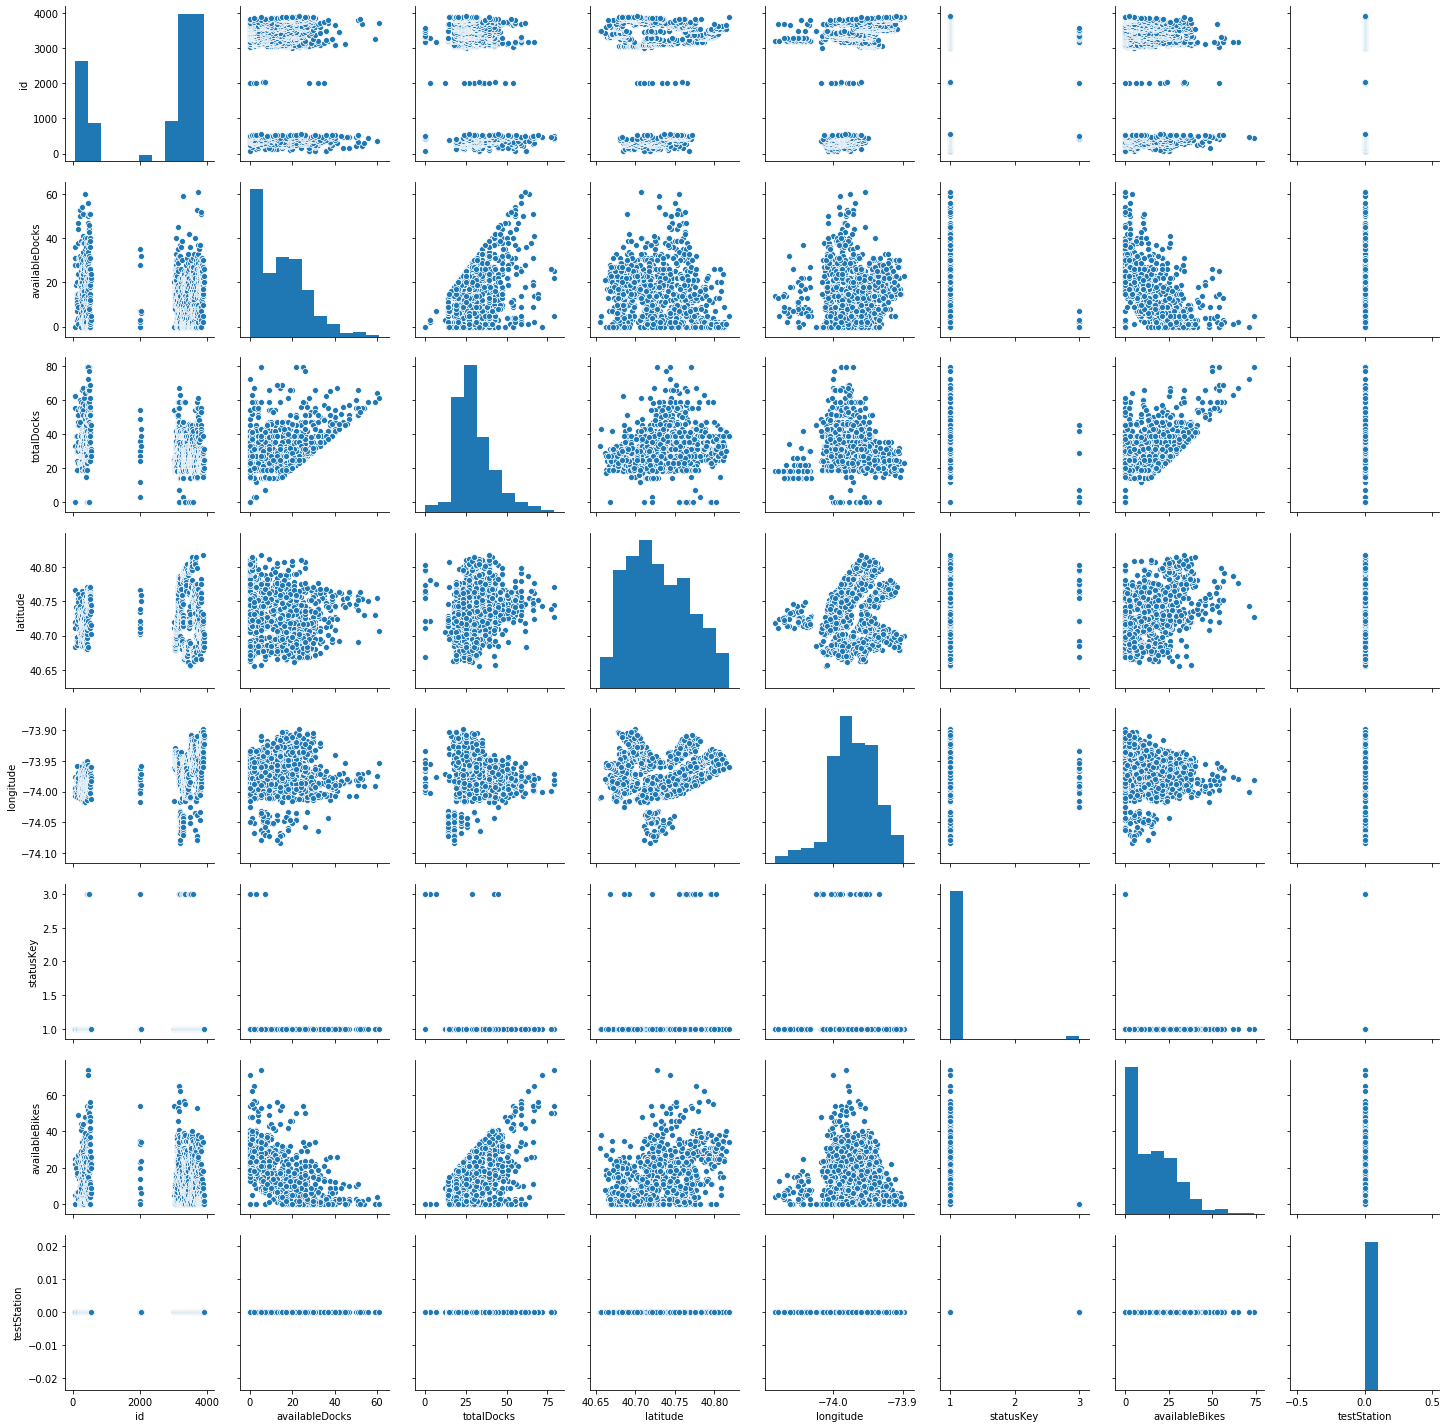

In [25]:
col=[nc[0],nc[1],nc[2],nc[3],nc[4],nc[5],nc[6],nc[7]]
sns.pairplot(df2[col])

### Since all are false we can drop teststation column...!

In [26]:
dfn.iloc[:,-1].value_counts(dropna=False)      

False    910
Name: testStation, dtype: int64

### We can drop statuskey column also ...!

In [27]:
dfn.iloc[:,-3].value_counts(dropna=False)       

1    892
3     18
Name: statusKey, dtype: int64

### Eliminating above columns and fitting regression line in pairplot to check outliers...!

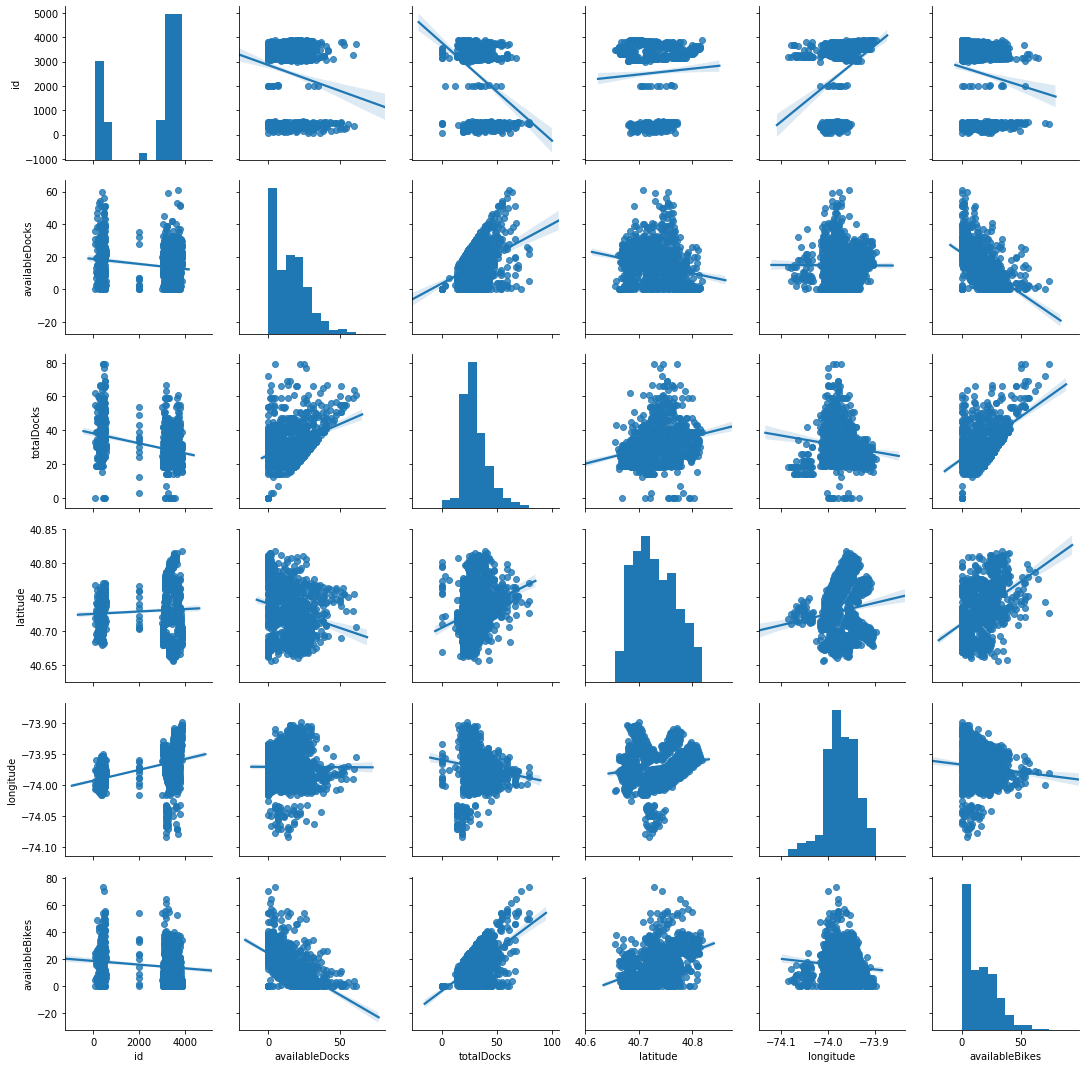

In [28]:
col=[nc[0],nc[1],nc[2],nc[3],nc[4],nc[6]]     
sns.pairplot(df2[col],kind='reg')

### Thier are some outliers but we will revemove it after checking catorical and converting it to numeric bcz we will have more columns to remove according to this that time...!

### Drop out the unwanted features i.e columns from numeric dataframe...!

In [29]:
new_dfn=dfn.drop('statusKey testStation'.split(),axis=1)
new_nc=list(new_dfn.columns)
new_dfn.head()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes
0,281,31,66,40.764397,-73.973715,34
1,307,11,30,40.714275,-73.989900,19
2,347,20,35,40.728846,-74.008591,15
3,358,33,50,40.732916,-74.007114,16
4,367,8,34,40.758281,-73.970694,26


In [30]:
new_nc

['id',
 'availableDocks',
 'totalDocks',
 'latitude',
 'longitude',
 'availableBikes']

### Checking cc(catogorical columns)

In [31]:
cc

['executionTime',
 'stationName',
 'statusValue',
 'stAddress1',
 'lastCommunicationTime']

#### Since executionTime have one same date throughout datapoints we can drop it...!

In [32]:
dfc.executionTime.unique()          

array(['2019-11-15 05:31:28 AM'], dtype=object)

#### Since all station name is different throughout the data we should drop this

In [33]:
dfc.stationName.value_counts(ascending=False,dropna=False)  

W 27 St & 7 Ave                   1
23 Ave & 27 St                    1
24 Ave & 29 St                    1
5 Ave & 3 St                      1
Verona Pl & Fulton St             1
Brunswick & 6th                   1
8 Ave & W 52 St                   1
Broadway & 12 St                  1
E 80 St & Park Ave                1
Carroll St & Smith St             1
35 Ave & 10 St                    1
Lafayette St & Jersey St          1
Broadway & E 22 St                1
10 St & 5 Ave                     1
W 129 St & Convent Ave            1
Peck Slip & Front St              1
Bialystoker Pl & Delancey St      1
Amsterdam Ave & W 125 St          1
University Pl & E 8 St            1
W 116 St & Amsterdam Ave          1
Morningside Dr & Amsterdam Ave    1
3 Ave & E 71 St                   1
Cadman Plaza E & Red Cross Pl     1
E 23 St & 1 Ave                   1
Irving Ave & Palmetto St          1
Dixon Mills                       1
Columbia St & W 9 St              1
E 88 St & 1 Ave             

#### Not imp but we will keep this bcz some data..!

In [34]:
dfc.statusValue.value_counts()     

In Service        891
Not In Service     19
Name: statusValue, dtype: int64

#### We will drop this because datapints throughout the column are differet...!

In [35]:
dfc.stAddress1.value_counts(ascending=False,dropna=False)     

W 27 St & 7 Ave                   1
23 Ave & 27 St                    1
24 Ave & 29 St                    1
5 Ave & 3 St                      1
Verona Pl & Fulton St             1
Brunswick & 6th                   1
8 Ave & W 52 St                   1
Broadway & 12 St                  1
E 80 St & Park Ave                1
Carroll St & Smith St             1
35 Ave & 10 St                    1
Lafayette St & Jersey St          1
Broadway & E 22 St                1
10 St & 5 Ave                     1
W 129 St & Convent Ave            1
Peck Slip & Front St              1
Bialystoker Pl & Delancey St      1
Amsterdam Ave & W 125 St          1
University Pl & E 8 St            1
W 116 St & Amsterdam Ave          1
Morningside Dr & Amsterdam Ave    1
3 Ave & E 71 St                   1
Cadman Plaza E & Red Cross Pl     1
E 23 St & 1 Ave                   1
Irving Ave & Palmetto St          1
Dixon Mills                       1
Columbia St & W 9 St              1
E 88 St & 1 Ave             

#### We will keep this...!

In [36]:
dfc.lastCommunicationTime.value_counts(ascending=False,dropna=False)    

2019-11-15 05:30:49 AM    11
2019-11-15 05:30:22 AM    10
2019-11-15 05:27:57 AM    10
2019-11-15 05:27:56 AM     9
2019-11-15 05:29:08 AM     9
2019-11-15 05:29:52 AM     8
2019-11-15 05:27:47 AM     8
2019-11-15 05:29:44 AM     8
2019-11-15 05:28:29 AM     8
2019-11-15 05:29:12 AM     8
2019-11-15 05:30:58 AM     8
2019-11-15 05:29:59 AM     8
2019-11-15 05:28:20 AM     8
2019-11-15 05:28:10 AM     8
2019-11-15 05:31:11 AM     7
2019-11-15 05:31:04 AM     7
2019-11-15 05:29:46 AM     7
2019-11-15 05:30:39 AM     7
2019-11-15 05:30:13 AM     7
2019-11-15 05:28:00 AM     7
2019-11-15 05:29:31 AM     7
2019-11-15 05:28:02 AM     7
2019-11-15 05:28:57 AM     7
2019-11-15 05:29:25 AM     7
2019-11-15 05:28:50 AM     6
2019-11-15 05:31:05 AM     6
2019-11-15 05:31:19 AM     6
2019-11-15 05:30:27 AM     6
2019-11-15 05:28:41 AM     6
2019-11-15 05:30:55 AM     6
                          ..
2019-11-15 05:28:27 AM     1
2019-11-15 05:28:22 AM     1
2019-10-23 11:06:21 AM     1
2019-11-15 05:

### Conlusion of catogorical : We will keep statusValue and lastCommunicationTime & drop all columns from dfc therefore....

### Removing unwanted columns from catogorical i.e indexing the wanted columns from dfc...!

In [37]:
new_dfc=dfc['statusValue lastCommunicationTime'.split()]
new_cc=list(new_dfc.columns)

new_dfc.head()

,statusValue,lastCommunicationTime
0,In Service,2019-11-15 05:30:53 AM
1,In Service,2019-11-15 05:29:45 AM
2,In Service,2019-11-15 05:29:32 AM
3,In Service,2019-11-15 05:30:24 AM
4,In Service,2019-11-15 05:30:25 AM


In [38]:
new_cc

['statusValue', 'lastCommunicationTime']

### Changing catagorical into numerical...!

In [39]:
new_dfc_to_dfn=pd.get_dummies(data=new_dfc,columns=new_cc,drop_first=True)
new_dfc_to_dfn.head()

,statusValue_Not In Service,lastCommunicationTime_2019-09-01 01:30:49 PM,lastCommunicationTime_2019-09-05 11:49:59 AM,lastCommunicationTime_2019-09-17 02:23:03 PM,lastCommunicationTime_2019-09-23 08:29:41 AM,lastCommunicationTime_2019-10-14 02:02:03 PM,lastCommunicationTime_2019-10-15 08:14:49 AM,lastCommunicationTime_2019-10-17 07:52:43 AM,lastCommunicationTime_2019-10-23 07:54:12 AM,lastCommunicationTime_2019-10-23 09:10:25 AM,...,lastCommunicationTime_2019-11-15 05:31:19 AM,lastCommunicationTime_2019-11-15 05:31:20 AM,lastCommunicationTime_2019-11-15 05:31:21 AM,lastCommunicationTime_2019-11-15 05:31:22 AM,lastCommunicationTime_2019-11-15 05:31:23 AM,lastCommunicationTime_2019-11-15 05:31:24 AM,lastCommunicationTime_2019-11-15 05:31:25 AM,lastCommunicationTime_2019-11-15 05:31:26 AM,lastCommunicationTime_2019-11-15 05:31:27 AM,lastCommunicationTime_2019-11-15 05:31:28 AM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Taking out final dataframes of cat & num

In [40]:
new_dfn.head(3)

,id,availableDocks,totalDocks,latitude,longitude,availableBikes
0,281,31,66,40.764397,-73.973715,34
1,307,11,30,40.714275,-73.989900,19
2,347,20,35,40.728846,-74.008591,15


In [41]:
new_dfc_to_dfn.head(3)      

,statusValue_Not In Service,lastCommunicationTime_2019-09-01 01:30:49 PM,lastCommunicationTime_2019-09-05 11:49:59 AM,lastCommunicationTime_2019-09-17 02:23:03 PM,lastCommunicationTime_2019-09-23 08:29:41 AM,lastCommunicationTime_2019-10-14 02:02:03 PM,lastCommunicationTime_2019-10-15 08:14:49 AM,lastCommunicationTime_2019-10-17 07:52:43 AM,lastCommunicationTime_2019-10-23 07:54:12 AM,lastCommunicationTime_2019-10-23 09:10:25 AM,...,lastCommunicationTime_2019-11-15 05:31:19 AM,lastCommunicationTime_2019-11-15 05:31:20 AM,lastCommunicationTime_2019-11-15 05:31:21 AM,lastCommunicationTime_2019-11-15 05:31:22 AM,lastCommunicationTime_2019-11-15 05:31:23 AM,lastCommunicationTime_2019-11-15 05:31:24 AM,lastCommunicationTime_2019-11-15 05:31:25 AM,lastCommunicationTime_2019-11-15 05:31:26 AM,lastCommunicationTime_2019-11-15 05:31:27 AM,lastCommunicationTime_2019-11-15 05:31:28 AM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaned dataframe after FE & FS  but without checking correlation...!

In [42]:
final_df_without_corr=pd.concat([new_dfn,new_dfc_to_dfn],axis=1)

final_df_without_corr.head()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes,statusValue_Not In Service,lastCommunicationTime_2019-09-01 01:30:49 PM,lastCommunicationTime_2019-09-05 11:49:59 AM,lastCommunicationTime_2019-09-17 02:23:03 PM,...,lastCommunicationTime_2019-11-15 05:31:19 AM,lastCommunicationTime_2019-11-15 05:31:20 AM,lastCommunicationTime_2019-11-15 05:31:21 AM,lastCommunicationTime_2019-11-15 05:31:22 AM,lastCommunicationTime_2019-11-15 05:31:23 AM,lastCommunicationTime_2019-11-15 05:31:24 AM,lastCommunicationTime_2019-11-15 05:31:25 AM,lastCommunicationTime_2019-11-15 05:31:26 AM,lastCommunicationTime_2019-11-15 05:31:27 AM,lastCommunicationTime_2019-11-15 05:31:28 AM
0,281,31,66,40.764397,-73.973715,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,307,11,30,40.714275,-73.989900,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,347,20,35,40.728846,-74.008591,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,358,33,50,40.732916,-74.007114,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,367,8,34,40.758281,-73.970694,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Checking correlation using heatmap

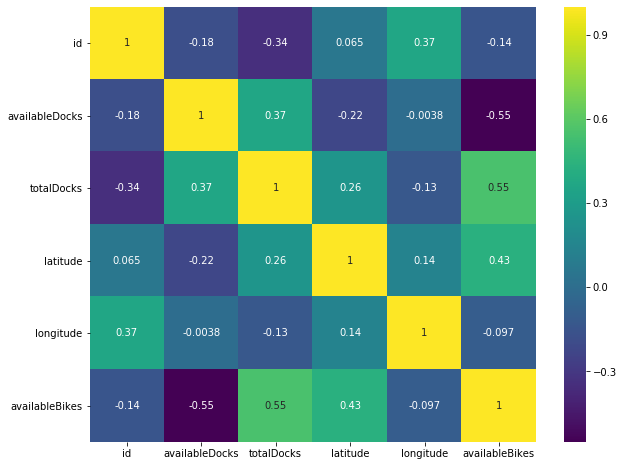

In [43]:
plt.figure(figsize=(10,8))

sns.heatmap(new_dfn.corr(),cmap="viridis",annot=True)

### Highest corr is 0.55 and -0.55 but we will keep since its not to high...!
# So final_df is :

In [44]:
final_df=final_df_without_corr

final_df.head(10)

,id,availableDocks,totalDocks,latitude,longitude,availableBikes,statusValue_Not In Service,lastCommunicationTime_2019-09-01 01:30:49 PM,lastCommunicationTime_2019-09-05 11:49:59 AM,lastCommunicationTime_2019-09-17 02:23:03 PM,...,lastCommunicationTime_2019-11-15 05:31:19 AM,lastCommunicationTime_2019-11-15 05:31:20 AM,lastCommunicationTime_2019-11-15 05:31:21 AM,lastCommunicationTime_2019-11-15 05:31:22 AM,lastCommunicationTime_2019-11-15 05:31:23 AM,lastCommunicationTime_2019-11-15 05:31:24 AM,lastCommunicationTime_2019-11-15 05:31:25 AM,lastCommunicationTime_2019-11-15 05:31:26 AM,lastCommunicationTime_2019-11-15 05:31:27 AM,lastCommunicationTime_2019-11-15 05:31:28 AM
0,281,31,66,40.764397,-73.973715,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,307,11,30,40.714275,-73.989900,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,347,20,35,40.728846,-74.008591,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,358,33,50,40.732916,-74.007114,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,367,8,34,40.758281,-73.970694,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,377,16,47,40.722438,-74.005664,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,426,14,29,40.717548,-74.013221,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,432,23,31,40.726218,-73.983799,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,438,40,47,40.727791,-73.985649,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,439,38,39,40.726281,-73.989780,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
final_df.shape

(910, 260)

## In above shape we can see the number columns are high so we will use
# Timeseries Manupulation to reduce it:

In [46]:
from datetime import datetime
new_dfc.head(3)

,statusValue,lastCommunicationTime
0,In Service,2019-11-15 05:30:53 AM
1,In Service,2019-11-15 05:29:45 AM
2,In Service,2019-11-15 05:29:32 AM


In [47]:
new_dfc.dtypes

statusValue              object
lastCommunicationTime    object
dtype: object

#### lastCommunicationTime is in object tpe we have to change this onto datetime[ns]  

In [48]:
new_dfc.lastCommunicationTime=pd.to_datetime(new_dfc.lastCommunicationTime)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
new_dfc.dtypes

statusValue                      object
lastCommunicationTime    datetime64[ns]
dtype: object

### Taking out date onl from date and time and droping lastCommunicationTime column:

In [50]:
new_dfc['Date']=new_dfc['lastCommunicationTime'].dt.date
new_dfc.drop('lastCommunicationTime',axis=1,inplace=True)
new_cc2=list(new_dfc.columns)

new_dfc.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,statusValue,Date
0,In Service,2019-11-15
1,In Service,2019-11-15
2,In Service,2019-11-15


# Since date is same throughout the data points except some we will drop it

In [81]:
new_dfc.Date.value_counts()

2019-11-15    895
2019-10-23      4
1969-12-31      2
2019-11-11      1
2019-09-01      1
2019-10-15      1
2019-09-05      1
2019-09-17      1
2019-09-23      1
2019-10-14      1
2019-11-12      1
2019-10-17      1
Name: Date, dtype: int64

In [83]:
new_dfc = new_dfc.drop(columns=['Date'])
new_dfc.head()

,statusValue
0,In Service
1,In Service
2,In Service
3,In Service
4,In Service


In [86]:
new_cc3 = list(new_dfc.columns)
new_cc3

['statusValue']

### Again using one not encoding to convert this to nuerical

In [88]:
new_dfc_to_dfn=pd.get_dummies(data=new_dfc,columns=new_cc3,drop_first=True)
new_dfc_to_dfn.head()

,statusValue_Not In Service
0,0
1,0
2,0
3,0
4,0


In [89]:
new_dfn.head()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes
0,281,31,66,40.764397,-73.973715,34
1,307,11,30,40.714275,-73.989900,19
2,347,20,35,40.728846,-74.008591,15
3,358,33,50,40.732916,-74.007114,16
4,367,8,34,40.758281,-73.970694,26


# final_df after Timeseries Manupulation :

In [90]:
final_df=pd.concat([new_dfn,new_dfc_to_dfn],axis=1)
final_df.head()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes,statusValue_Not In Service
0,281,31,66,40.764397,-73.973715,34,0
1,307,11,30,40.714275,-73.989900,19,0
2,347,20,35,40.728846,-74.008591,15,0
3,358,33,50,40.732916,-74.007114,16,0
4,367,8,34,40.758281,-73.970694,26,0


In [91]:
final_df.shape

(910, 7)

# Hence 260 columns is reduced to 7

# Checking NaN values and filling it:
### But can be checked and fill before one hot encoding so again calling the required dataframes & concating them:

In [92]:
new_dfn.head()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes
0,281,31,66,40.764397,-73.973715,34
1,307,11,30,40.714275,-73.989900,19
2,347,20,35,40.728846,-74.008591,15
3,358,33,50,40.732916,-74.007114,16
4,367,8,34,40.758281,-73.970694,26


In [93]:
new_dfc.head()

,statusValue
0,In Service
1,In Service
2,In Service
3,In Service
4,In Service


In [94]:
new_df=pd.concat([new_dfn,new_dfc],axis=1)
new_df.head()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes,statusValue
0,281,31,66,40.764397,-73.973715,34,In Service
1,307,11,30,40.714275,-73.989900,19,In Service
2,347,20,35,40.728846,-74.008591,15,In Service
3,358,33,50,40.732916,-74.007114,16,In Service
4,367,8,34,40.758281,-73.970694,26,In Service


In [95]:
new_df.shape

(910, 7)

In [96]:
new_df.isnull().sum()

id                0
availableDocks    0
totalDocks        0
latitude          0
longitude         0
availableBikes    0
statusValue       0
dtype: int64

# Hence no NaN values are present final_df is unchaged:
## The columns like ( testStation, stAddress1, statusKey, stationName, stationName, ) was not droped on the basis of NaN so thier is no need to check this columns:

# So final_df is:

In [97]:
final_df.head()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes,statusValue_Not In Service
0,281,31,66,40.764397,-73.973715,34,0
1,307,11,30,40.714275,-73.989900,19,0
2,347,20,35,40.728846,-74.008591,15,0
3,358,33,50,40.732916,-74.007114,16,0
4,367,8,34,40.758281,-73.970694,26,0


In [98]:
final_df.shape

(910, 7)

In [99]:
final_df.to_csv('C:/Users/kasm/jason_project_home.csv')

In [100]:
final_df.describe()

,id,availableDocks,totalDocks,latitude,longitude,availableBikes,statusValue_Not In Service
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,2544.126374,14.821978,30.673626,40.729894,-73.971084,15.319780,0.020879
std,1415.978019,12.033011,12.109696,0.038509,0.033337,13.417717,0.143058
min,72.000000,0.000000,0.000000,40.655400,-74.083639,0.000000,0.000000
25%,496.250000,4.000000,23.000000,40.697943,-73.991555,3.000000,0.000000
50%,3285.500000,14.000000,27.000000,40.724301,-73.971213,13.000000,0.000000
75%,3567.750000,22.000000,37.750000,40.760163,-73.947701,25.000000,0.000000
max,3895.000000,61.000000,79.000000,40.818299,-73.897950,74.000000,1.000000


In [101]:
final_df.totalDocks.value_counts(ascending=False)    # Should be there

27    84
23    70
31    66
19    66
25    56
39    56
21    40
35    30
24    30
29    29
18    26
30    26
33    25
22    21
43    20
47    18
41    16
14    15
20    13
34    13
42    13
0     13
45    12
36    12
51    11
26    10
37    10
55     9
59     9
32     7
      ..
54     7
46     6
66     5
15     5
40     4
38     4
50     4
53     4
56     3
17     3
67     3
61     3
79     3
49     3
69     2
3      2
57     2
52     2
77     1
63     1
64     1
65     1
58     1
48     1
16     1
72     1
12     1
7      1
60     1
62     1
Name: totalDocks, Length: 61, dtype: int64

In [102]:
final_df.availableBikes.value_counts(ascending=False)    # Should be there

0     93
3     51
2     44
1     42
5     35
4     31
7     28
8     27
15    27
9     26
25    24
6     23
26    23
11    23
13    23
21    21
24    20
29    20
23    19
19    18
17    18
20    17
16    17
14    17
31    16
22    16
27    16
18    16
10    15
35    13
33    11
28    11
12    11
34    10
32     9
30     9
37     9
38     9
39     8
36     7
54     5
46     4
41     3
40     2
56     2
44     2
49     2
50     2
42     2
48     2
53     2
65     1
62     1
57     1
52     1
55     1
71     1
51     1
43     1
74     1
Name: availableBikes, dtype: int64

In [103]:
final_df.longitude.value_counts(ascending=False)           # slow variation in values

-73.993641    1
-73.990632    1
-73.994403    1
-73.988038    1
-74.032108    1
-73.917900    1
-73.967597    1
-73.993836    1
-74.050990    1
-73.990093    1
-73.985180    1
-73.991908    1
-74.009447    1
-73.986905    1
-73.945948    1
-74.044247    1
-73.976682    1
-73.998522    1
-73.928250    1
-73.982820    1
-73.993790    1
-74.008387    1
-73.932146    1
-74.002939    1
-73.966490    1
-73.971214    1
-73.980689    1
-74.000264    1
-73.982912    1
-73.967510    1
             ..
-73.989180    1
-73.909250    1
-73.986923    1
-73.992390    1
-73.952499    1
-74.033759    1
-74.004519    1
-73.904480    1
-73.933720    1
-74.009660    1
-73.956495    1
-74.005226    1
-73.969053    1
-73.965790    1
-74.016777    1
-73.947283    1
-73.997858    1
-73.955778    1
-74.001626    1
-73.902710    1
-73.952123    1
-73.969024    1
-73.929760    1
-73.961199    1
-73.971518    1
-73.920933    1
-73.909040    1
-73.929970    1
-73.997178    1
-74.047727    1
Name: longitude, Length:

In [104]:
final_df.latitude.value_counts(ascending=False)     # slow variation in values...

40.722104    2
40.777057    1
40.755293    1
40.736529    1
40.704118    1
40.723077    1
40.720195    1
40.759345    1
40.771394    1
40.682800    1
40.793297    1
40.737711    1
40.719240    1
40.712774    1
40.681390    1
40.679098    1
40.783964    1
40.798186    1
40.799139    1
40.707165    1
40.704610    1
40.692317    1
40.679331    1
40.785785    1
40.765005    1
40.720368    1
40.723684    1
40.787801    1
40.670484    1
40.696760    1
            ..
40.721791    1
40.722482    1
40.725806    1
40.681990    1
40.756913    1
40.733812    1
40.691782    1
40.804038    1
40.752269    1
40.767100    1
40.719105    1
40.801343    1
40.791270    1
40.686520    1
40.668132    1
40.683116    1
40.705770    1
40.709056    1
40.759107    1
40.744697    1
40.698458    1
40.776321    1
40.680213    1
40.714211    1
40.705380    1
40.719586    1
40.691029    1
40.701130    1
40.692216    1
40.810285    1
Name: latitude, Length: 909, dtype: int64

In [105]:
final_df.id.value_counts(ascending=False).head()       #This isto be set as index or we should drop

2022    1
3062    1
3094    1
3093    1
3092    1
Name: id, dtype: int64

In [106]:
final_df.availableDocks.value_counts(ascending=False)

0     97
1     51
2     37
18    34
22    33
5     31
6     29
8     29
19    29
20    28
15    27
17    27
3     26
14    25
16    23
7     23
21    22
23    22
13    21
26    21
4     21
12    20
25    20
10    19
9     19
24    19
11    17
27    16
30    14
31    13
28    11
29    11
33     9
38     7
32     7
40     6
39     6
35     5
36     5
51     4
37     3
47     3
53     2
42     2
34     2
44     2
50     2
59     1
56     1
54     1
60     1
43     1
52     1
46     1
45     1
41     1
61     1
Name: availableDocks, dtype: int64

In [107]:
final_df.head(2)

,id,availableDocks,totalDocks,latitude,longitude,availableBikes,statusValue_Not In Service
0,281,31,66,40.764397,-73.973715,34,0
1,307,11,30,40.714275,-73.989900,19,0


In [108]:
final_df2 = final_df.drop('id longitude latitude'.split(),axis=1)
final_df2.head()

,availableDocks,totalDocks,availableBikes,statusValue_Not In Service
0,31,66,34,0
1,11,30,19,0
2,20,35,15,0
3,33,50,16,0
4,8,34,26,0


In [109]:
final_df2.shape

(910, 4)

## Renaming the column name to have Proper case...!

In [110]:
final_df2.rename(columns={'availableDocks':'AvailableDocks','totalDocks':'TotalDocks','availableBikes':'AvailableBikes',
                         'statusValue_Not In Service':'StatusValue_Not In Service'},inplace=True)
final_df2.head()

,AvailableDocks,TotalDocks,AvailableBikes,StatusValue_Not In Service
0,31,66,34,0
1,11,30,19,0
2,20,35,15,0
3,33,50,16,0
4,8,34,26,0


In [111]:
final_df2.shape

(910, 4)

In [112]:
f_nc=final_df2.iloc[:,0:3].columns
a=list(f_nc)
a

['AvailableDocks', 'TotalDocks', 'AvailableBikes']

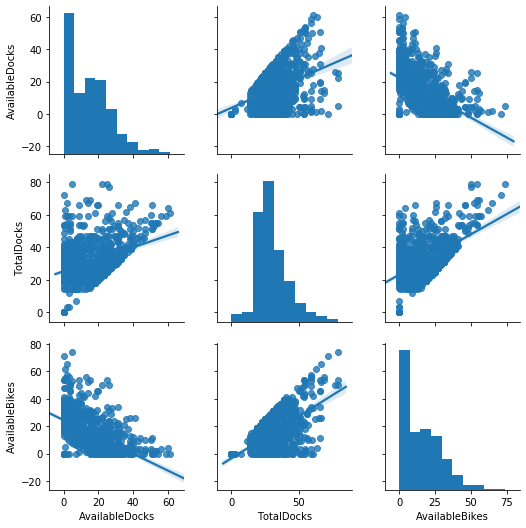

In [113]:
sns.pairplot(final_df2[a],kind='reg')

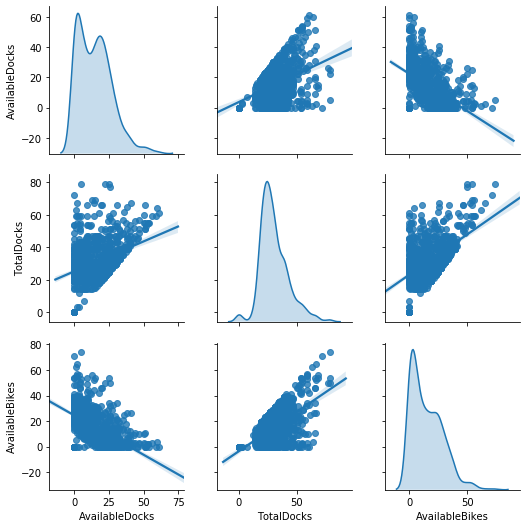

In [114]:
sns.pairplot(final_df2[a],diag_kind='kde',kind='reg')

# Conclusion:   
## On The basis of 2019 months of July, Sep, Oct ( ExecutionTime:2019-10-05 05:34:19 PM )
### 1. AvailableDocks Directly Propotional to TotalDocks.
### 2. AvailableBikers Inversely Proportional to AvailableDocks.   
### 3. TotalDocks Directly Proportional to AvailableBikes.
### 4. On which instence this above feature was on top can be seen in histogram, lmpot & kde.
### 5. Number of Outliers is low.

In [115]:
# End...Happy Learning...:)